# Task 4 Time Series Analysis
*Alberto Roberto Marinelli, Giacomo Cignoni, Alessandro Bucci*
## Importing Libraries
First we import the libraries necessary to extract the time series


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from math import pi
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("../dataset/cleaned_joined_tweets.csv", index_col = 0) 
del df['lang']
del df['bot']
del df['text']
del df['created_at_user']
del df['statuses_count']
del df['id'] #of the tweet

c:\Users\giaco\anaconda3\envs\PythonGPU\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df.created_at = pd.to_datetime(df.created_at, errors='ignore').astype('datetime64[D]')
df.sort_values(by=['user_id', 'created_at'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4722646 entries, 4499433 to 4080317
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   user_id         int64         
 1   retweet_count   int64         
 2   reply_count     int64         
 3   favorite_count  int64         
 4   num_hashtags    int64         
 5   num_urls        int64         
 6   num_mentions    int64         
 7   created_at      datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 324.3 MB


Get only the tweets in 2019:

In [4]:
min_date = np.datetime64('2019-01-01 00:00:00')
max_date = np.datetime64('2019-12-31 23:59:59')

df_2019 = df[(df.created_at > min_date) & (df.created_at < max_date)].copy()

For each user we define a series of 365 values initialized at -1, so we define a dataframe of Number_of_users * 365

In [5]:
df_2019.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at
3343007,722623,1,0,0,0,0,2,2019-01-03
3343357,722623,0,0,2,0,0,0,2019-01-03
3343475,722623,0,0,0,0,0,0,2019-01-03
3343674,722623,0,0,0,0,0,0,2019-01-03
3344173,722623,3,0,0,0,0,1,2019-01-03


## Extract timeseries

### Use pivoting

In [6]:
user_2019 = df_2019.groupby(['user_id', 'created_at']).sum()

In [7]:
user_2019['success_score'] = (user_2019.retweet_count + user_2019.reply_count + user_2019.favorite_count) / (user_2019.num_hashtags + user_2019.num_urls + user_2019.num_mentions + 0.1)

Deleting the columns used for the calculation

In [8]:
del user_2019['retweet_count']
del user_2019['reply_count']
del user_2019['favorite_count']
del user_2019['num_hashtags']
del user_2019['num_urls']
del user_2019['num_mentions']

In [9]:
user_2019 = user_2019.pivot_table('success_score','created_at','user_id')
user_2019.rename_axis(columns=None, inplace=True)
user_2019.reset_index(drop=False, inplace=True)

In [10]:
user_2019

,created_at,722623,755746,5812422,8657052,9272142,12287842,13126372,14290542,14391111,...,2469738596,2492782375,2497379616,2505222079,2528822924,2596494170,2599346388,2615998837,2619891104,2680793168
0,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,1.549296,0.000000,0.10989,NaN,NaN,NaN,NaN,107.024030,0.243902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,1626.393443,0.000000,4.83871,NaN,NaN,99.503546,0.392157,39.321267,0.476190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-05,1.818182,0.000000,0.00000,NaN,NaN,0.000000,0.000000,415.352113,0.952381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-06,0.322581,0.163934,0.00000,NaN,NaN,69.268293,NaN,105.045045,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,2019-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2019-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
dates = pd.Series(pd.date_range('01-01-2019','31-12-2019')).rename('created_at')

user_2019 = user_2019.merge(dates, how='outer', on='created_at')
user_2019.fillna(-1, inplace=True)
user_2019.set_index('created_at', inplace=True)

In [12]:
user_2019

,722623,755746,5812422,8657052,9272142,12287842,13126372,14290542,14391111,14558848,...,2469738596,2492782375,2497379616,2505222079,2528822924,2596494170,2599346388,2615998837,2619891104,2680793168
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-02,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-03,1.549296,0.000000,0.10989,-1.0,-1.0,-1.000000,-1.000000,107.024030,0.243902,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-04,1626.393443,0.000000,4.83871,-1.0,-1.0,99.503546,0.392157,39.321267,0.476190,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-05,1.818182,0.000000,0.00000,-1.0,-1.0,0.000000,0.000000,415.352113,0.952381,20.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-01-06,0.322581,0.163934,0.00000,-1.0,-1.0,69.268293,-1.000000,105.045045,0.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-12-28,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2019-12-29,-1.000000,-1.000000,-1.00000,-1.0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
user_2019.to_csv('../dataset/time_series.csv')

Plot some timeseries

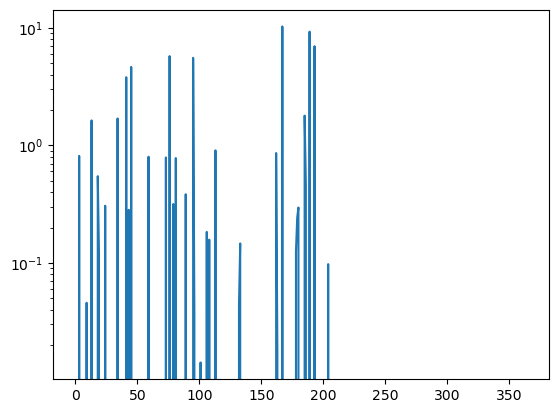

Mean: 0.0


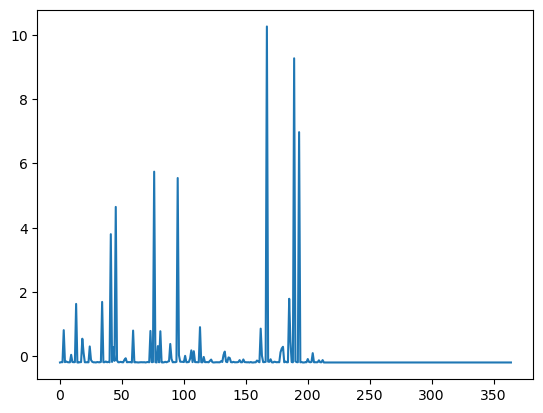

In [59]:
scaler = StandardScaler()
user_2019_std = scaler.fit_transform(user_2019)
ts_example = user_2019_std[:, 29]

plt.plot(ts_example )
plt.yscale('log')
plt.show()
plt.plot(ts_example - ts_example.mean())
print('Mean:', ts_example.mean())
plt.show()

## Preprocessing

### Detect and Remove trends
ad esempio sottrai la moving average alla timeseries

### Moving average
prova diverse window

### Time series scaler
prova minmax e std-mean

### Resample ??

## Clustering timeseries